In [8]:
from spectacle.core.spectra import Spectrum1D
from spectacle.process.lsf import LSF
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from spectacle.modeling.fitting import LevMarFitter
from astropy.modeling.models import Linear1D
from spectacle.core.models import Voigt1D

from uncertainties import unumpy as unp

In [9]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [16, 8]

# Identify and parameterize real data
This is an example notebook of taking some real data and fitting an absorption feature. It is very basic, and uses all the default settings.

## Load data
Load the data. The fitter currently assumes that all data has been normalized to 1.

In [10]:
# Load real data
hdulist = fits.open("/Users/nearl/projects/hst_proposal/QSOALS/3C066A/3C066A_coadd_FUVM_final_all.fits")
disp, flux, uncert, dq = hdulist[1].data['WAVE'], hdulist[1].data['FLUX'], \
                         hdulist[1].data['ERROR'], hdulist[1].data['DQ']


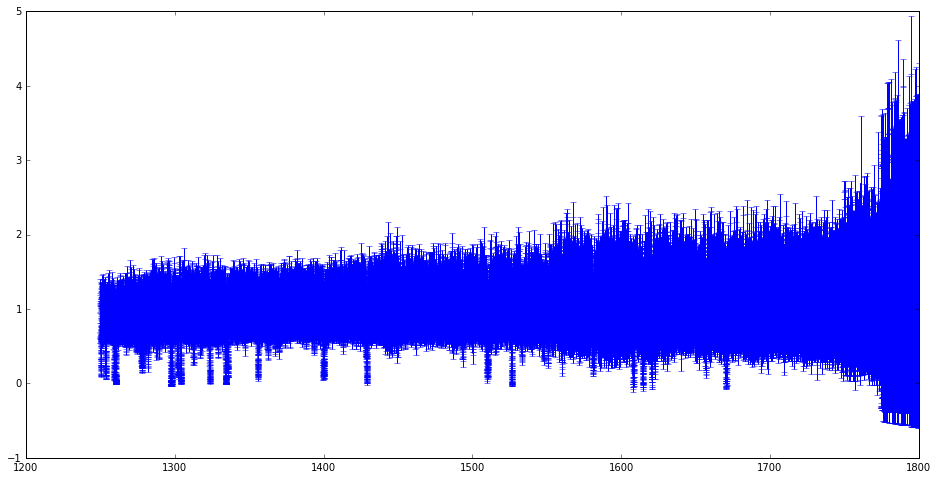

In [15]:
# Create a mask and apply it since we don't really care about the entire spectrum
mask = [(disp > 1250) & (disp < 1800)]

flux = flux[mask]
disp = disp[mask]
uncert = uncert[mask]

# Currently, the fitting assumes that the data is normalized to 1.0
tmp_flux = unp.uarray(flux, uncert)
tmp_flux /= np.median(tmp_flux)
flux, uncert = unp.nominal_values(tmp_flux), unp.std_devs(tmp_flux)

# Create spectrum object
spectrum = Spectrum1D(disp, flux, uncertainty=uncert)

# Plot the spectrum
plt.errorbar(spectrum.dispersion, spectrum.flux, yerr=spectrum.uncertainty)
# plt.plot(spectrum.dispersion, spectrum.flux)
plt.show()

## Create `Fitter`
The `Fitter` object encapsulates the method of fitting, along with the line identifying and detrending routines. Certain parameters, like the distance between identified lines, and the noise level can also be set.

In [16]:
# Create a fitter. The default fitting routine is a LevMarLSQ.
fitter = LevMarFitter()
result_spectrum = fitter(spectrum)
print(fitter.fit_info)

# Plot the fitted spectrum with the original
plt.errorbar(spectrum.dispersion, spectrum.flux, yerr=spectrum.uncertainty)
plt.plot(result_spectrum.dispersion, result_spectrum.flux, color='red')

Found 113 peaks


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 100.

Let's get some first- and second-order information out of this.

In [ ]:
print("Equivalent width: {}".format(result_spectrum.equivalent_width()))
print("FWHM: {}".format(result_spectrum.fwhm(1356)))
print("Optical Depth: {}".format(result_spectrum.optical_depth(1356)))
print("Centroid: {}".format(result_spectrum.centroid(1356)))

In [ ]:
print(result_spectrum.model)